In [28]:
import os
import re
import csv
from datetime import datetime
import smtplib
from email.mime.text import MIMEText
import subprocess
from subprocess import check_output
import matplotlib.pyplot as plt
import pandas as pd
import time
import hashlib
import numpy as np

def extract_values(input_list):
    numeric_values = []
    converted_values = []

    for value_with_unit in input_list:
        match = re.match(r'(\d+\.\d+|\d+)(\w+)/s', value_with_unit)
        if match:
            numeric_value = float(match.group(1))
            unit = match.group(2)

            if unit == 'KiB':
                numeric_value /= 1024  # Convert KiB to MiB

            numeric_values.append(numeric_value)
            converted_values.append(f'{numeric_value}MiB/s')

    return numeric_values

def condition_generator(bs, qd, cs, pt, dt):
    conditions_lsvd_ssd_rr = (
        (df['pool_type'] == pt) & 
        (df['disk_type'] == dt) & 
        (df['cache_size'] == cs) & 
        (df['workload'] == 'randread') &
        (df['bs'] == bs) &
        (df['iodepth']==qd)
    )
    
    conditions_lsvd_ssd_rw = (
        (df['pool_type'] == pt) & 
        (df['disk_type'] == dt) & 
        (df['cache_size'] == cs) & 
        (df['workload'] == 'randwrite') &
        (df['bs'] == bs) &
        (df['iodepth']==qd)
    )
    
    conditions_lsvd_ssd_sr = (
        (df['pool_type'] == pt) & 
        (df['disk_type'] == dt) & 
        (df['cache_size'] == cs) & 
        (df['workload'] == 'read') &
        (df['bs'] == bs) &
        (df['iodepth']==qd)
    )
    
    conditions_lsvd_ssd_sw = (
        (df['pool_type'] == pt) & 
        (df['disk_type'] == dt) & 
        (df['cache_size'] == cs) & 
        (df['workload'] == 'write') &
        (df['bs'] == bs) &
        (df['iodepth']==qd)
    )
    return conditions_lsvd_ssd_rr, conditions_lsvd_ssd_rw, conditions_lsvd_ssd_sr, conditions_lsvd_ssd_sw

df = pd.read_csv("single_fio.csv")

In [29]:
bs='4ki'
qd=256
cs='20gb'
pt='ssd'
dt='lsvd'

conditions_20gb_lsvd_ssd_rr, conditions_20gb_lsvd_ssd_rw, conditions_20gb_lsvd_ssd_sr, conditions_20gb_lsvd_ssd_sw = condition_generator(bs, qd, cs, pt, dt)

pt ='hdd'

conditions_20gb_lsvd_hdd_rr, conditions_20gb_lsvd_hdd_rw, conditions_20gb_lsvd_hdd_sr, conditions_20gb_lsvd_hdd_sw = condition_generator(bs, qd, cs, pt, dt)

dt='rbd'
pt='ssd'
cs='none'

conditions_rbd_ssd_rr, conditions_rbd_ssd_rw, conditions_rbd_ssd_sr, conditions_rbd_ssd_sw = condition_generator(bs, qd, cs, pt, dt)
#condition for rbd_ssd


pt='hdd'

conditions_rbd_hdd_rr, conditions_rbd_hdd_rw, conditions_rbd_hdd_sr, conditions_rbd_hdd_sw = condition_generator(bs, qd, cs, pt, dt)

bw_20gb_lsvd_ssd_rr=df[conditions_20gb_lsvd_ssd_rr]
bw_20gb_lsvd_ssd_rr=bw_20gb_lsvd_ssd_rr['bw'].iloc[0]
# print(bw_20gb_lsvd_ssd_rr)

bw_rbd_ssd_rr=df[conditions_rbd_ssd_rr]
bw_rbd_ssd_rr=bw_rbd_ssd_rr['bw'].iloc[0]
# print(bw_rbd_ssd_rr)

bw_20gb_lsvd_ssd_rw=df[conditions_20gb_lsvd_ssd_rw]
bw_20gb_lsvd_ssd_rw=bw_20gb_lsvd_ssd_rw['bw'].iloc[0]
# print(bw_20gb_lsvd_ssd_rw)

bw_rbd_ssd_rw=df[conditions_rbd_ssd_rw]
bw_rbd_ssd_rw=bw_rbd_ssd_rw['bw'].iloc[0]
#print(bw_rbd_ssd_rw)

bw_20gb_lsvd_ssd_sr=df[conditions_20gb_lsvd_ssd_sr]
bw_20gb_lsvd_ssd_sr=bw_20gb_lsvd_ssd_sr['bw'].iloc[0]
#print(bw_20gb_lsvd_ssd_sr)

bw_rbd_ssd_sr=df[conditions_rbd_ssd_sr]
bw_rbd_ssd_sr=bw_rbd_ssd_sr['bw'].iloc[0]
#print(bw_rbd_ssd_sr)

bw_20gb_lsvd_ssd_sw=df[conditions_20gb_lsvd_ssd_sw]
bw_20gb_lsvd_ssd_sw=bw_20gb_lsvd_ssd_sw['bw'].iloc[0]
#print(bw_20gb_lsvd_ssd_sw)

bw_rbd_ssd_sw=df[conditions_rbd_ssd_sw]
bw_rbd_ssd_sw=bw_rbd_ssd_sw['bw'].iloc[0]
#print(bw_rbd_ssd_sw)

bw_20gb_ssd_array=[bw_20gb_lsvd_ssd_rr, bw_rbd_ssd_rr, bw_20gb_lsvd_ssd_rw, bw_rbd_ssd_rw,
              bw_20gb_lsvd_ssd_sr, bw_rbd_ssd_sr, bw_20gb_lsvd_ssd_sw, bw_rbd_ssd_sw ]
print(bw_20gb_ssd_array)
bw_20gb_ssd_array1 = extract_values(bw_20gb_ssd_array)
print(bw_20gb_ssd_array1)



bw_20gb_lsvd_hdd_rr=df[conditions_20gb_lsvd_hdd_rr]
bw_20gb_lsvd_hdd_rr=bw_20gb_lsvd_hdd_rr['bw'].iloc[0]
# print(bw_20gb_lsvd_hdd_rr)

bw_rbd_hdd_rr=df[conditions_rbd_hdd_rr]
bw_rbd_hdd_rr=bw_rbd_hdd_rr['bw'].iloc[0]
# print(bw_rbd_hdd_rr)

bw_20gb_lsvd_hdd_rw=df[conditions_20gb_lsvd_hdd_rw]
bw_20gb_lsvd_hdd_rw=bw_20gb_lsvd_hdd_rw['bw'].iloc[0]
# print(bw_20gb_lsvd_hdd_rw)

bw_rbd_hdd_rw=df[conditions_rbd_hdd_rw]
bw_rbd_hdd_rw=bw_rbd_hdd_rw['bw'].iloc[0]
#print(bw_rbd_hdd_rw)

bw_20gb_lsvd_hdd_sr=df[conditions_20gb_lsvd_hdd_sr]
bw_20gb_lsvd_hdd_sr=bw_20gb_lsvd_hdd_sr['bw'].iloc[0]
#print(bw_20gb_lsvd_hdd_sr)

bw_rbd_hdd_sr=df[conditions_rbd_hdd_sr]
bw_rbd_hdd_sr=bw_rbd_hdd_sr['bw'].iloc[0]
#print(bw_rbd_hdd_sr)

bw_20gb_lsvd_hdd_sw=df[conditions_20gb_lsvd_hdd_sw]
bw_20gb_lsvd_hdd_sw=bw_20gb_lsvd_hdd_sw['bw'].iloc[0]
#print(bw_20gb_lsvd_hdd_sw)

bw_rbd_hdd_sw=df[conditions_rbd_hdd_sw]
bw_rbd_hdd_sw=bw_rbd_hdd_sw['bw'].iloc[0]
#print(bw_rbd_hdd_sw)

bw_20gb_hdd_array=[bw_20gb_lsvd_hdd_rr, bw_rbd_hdd_rr, bw_20gb_lsvd_hdd_rw, bw_rbd_hdd_rw,
              bw_20gb_lsvd_hdd_sr, bw_rbd_hdd_sr, bw_20gb_lsvd_hdd_sw, bw_rbd_hdd_sw ]
print(bw_20gb_hdd_array)
bw_20gb_hdd_array1 = extract_values(bw_20gb_hdd_array)
print(bw_20gb_hdd_array1)

['89.3MiB/s', '231MiB/s', '190MiB/s', '144MiB/s', '307MiB/s', '19.4MiB/s', '187MiB/s', '52.3MiB/s']
[89.3, 231.0, 190.0, 144.0, 307.0, 19.4, 187.0, 52.3]
['20.4MiB/s', '31.5MiB/s', '180MiB/s', '4907KiB/s', '309MiB/s', '19.8MiB/s', '184MiB/s', '7194KiB/s']
[20.4, 31.5, 180.0, 4.7919921875, 309.0, 19.8, 184.0, 7.025390625]


In [30]:

bs='4ki'
qd=256
cs='240gb'
pt='ssd'
dt='lsvd'

conditions_240gb_lsvd_ssd_rr, conditions_240gb_lsvd_ssd_rw, conditions_240gb_lsvd_ssd_sr, conditions_240gb_lsvd_ssd_sw = condition_generator(bs, qd, cs, pt, dt)

pt ='hdd'

conditions_240gb_lsvd_hdd_rr, conditions_240gb_lsvd_hdd_rw, conditions_240gb_lsvd_hdd_sr, conditions_240gb_lsvd_hdd_sw = condition_generator(bs, qd, cs, pt, dt)

dt='rbd'
pt='ssd'
cs='none'

conditions_rbd_ssd_rr, conditions_rbd_ssd_rw, conditions_rbd_ssd_sr, conditions_rbd_ssd_sw = condition_generator(bs, qd, cs, pt, dt)
#condition for rbd_ssd


pt='hdd'

conditions_rbd_hdd_rr, conditions_rbd_hdd_rw, conditions_rbd_hdd_sr, conditions_rbd_hdd_sw = condition_generator(bs, qd, cs, pt, dt)

bw_240gb_lsvd_ssd_rr=df[conditions_240gb_lsvd_ssd_rr]
bw_240gb_lsvd_ssd_rr=bw_240gb_lsvd_ssd_rr['bw'].iloc[0]
# print(bw_240gb_lsvd_ssd_rr)

bw_rbd_ssd_rr=df[conditions_rbd_ssd_rr]
bw_rbd_ssd_rr=bw_rbd_ssd_rr['bw'].iloc[0]
# print(bw_rbd_ssd_rr)

bw_240gb_lsvd_ssd_rw=df[conditions_240gb_lsvd_ssd_rw]
bw_240gb_lsvd_ssd_rw=bw_240gb_lsvd_ssd_rw['bw'].iloc[0]
# print(bw_240gb_lsvd_ssd_rw)

bw_rbd_ssd_rw=df[conditions_rbd_ssd_rw]
bw_rbd_ssd_rw=bw_rbd_ssd_rw['bw'].iloc[0]
#print(bw_rbd_ssd_rw)

bw_240gb_lsvd_ssd_sr=df[conditions_240gb_lsvd_ssd_sr]
bw_240gb_lsvd_ssd_sr=bw_240gb_lsvd_ssd_sr['bw'].iloc[0]
#print(bw_240gb_lsvd_ssd_sr)

bw_rbd_ssd_sr=df[conditions_rbd_ssd_sr]
bw_rbd_ssd_sr=bw_rbd_ssd_sr['bw'].iloc[0]
#print(bw_rbd_ssd_sr)

bw_240gb_lsvd_ssd_sw=df[conditions_240gb_lsvd_ssd_sw]
bw_240gb_lsvd_ssd_sw=bw_240gb_lsvd_ssd_sw['bw'].iloc[0]
#print(bw_240gb_lsvd_ssd_sw)

bw_rbd_ssd_sw=df[conditions_rbd_ssd_sw]
bw_rbd_ssd_sw=bw_rbd_ssd_sw['bw'].iloc[0]
#print(bw_rbd_ssd_sw)

bw_240gb_ssd_array=[bw_240gb_lsvd_ssd_rr, bw_rbd_ssd_rr, bw_240gb_lsvd_ssd_rw, bw_rbd_ssd_rw,
              bw_240gb_lsvd_ssd_sr, bw_rbd_ssd_sr, bw_240gb_lsvd_ssd_sw, bw_rbd_ssd_sw ]
print(bw_240gb_ssd_array)
bw_240gb_ssd_array1 = extract_values(bw_240gb_ssd_array)
print(bw_240gb_ssd_array1)






bw_240gb_lsvd_hdd_rr=df[conditions_240gb_lsvd_hdd_rr]
bw_240gb_lsvd_hdd_rr=bw_240gb_lsvd_hdd_rr['bw'].iloc[0]
# print(bw_240gb_lsvd_hdd_rr)

bw_rbd_hdd_rr=df[conditions_rbd_hdd_rr]
bw_rbd_hdd_rr=bw_rbd_hdd_rr['bw'].iloc[0]
# print(bw_rbd_hdd_rr)

bw_240gb_lsvd_hdd_rw=df[conditions_240gb_lsvd_hdd_rw]
bw_240gb_lsvd_hdd_rw=bw_240gb_lsvd_hdd_rw['bw'].iloc[0]
# print(bw_240gb_lsvd_hdd_rw)

bw_rbd_hdd_rw=df[conditions_rbd_hdd_rw]
bw_rbd_hdd_rw=bw_rbd_hdd_rw['bw'].iloc[0]
#print(bw_rbd_hdd_rw)

bw_240gb_lsvd_hdd_sr=df[conditions_240gb_lsvd_hdd_sr]
bw_240gb_lsvd_hdd_sr=bw_240gb_lsvd_hdd_sr['bw'].iloc[0]
#print(bw_240gb_lsvd_hdd_sr)

bw_rbd_hdd_sr=df[conditions_rbd_hdd_sr]
bw_rbd_hdd_sr=bw_rbd_hdd_sr['bw'].iloc[0]
#print(bw_rbd_hdd_sr)

bw_240gb_lsvd_hdd_sw=df[conditions_240gb_lsvd_hdd_sw]
bw_240gb_lsvd_hdd_sw=bw_240gb_lsvd_hdd_sw['bw'].iloc[0]
#print(bw_240gb_lsvd_hdd_sw)

bw_rbd_hdd_sw=df[conditions_rbd_hdd_sw]
bw_rbd_hdd_sw=bw_rbd_hdd_sw['bw'].iloc[0]
#print(bw_rbd_hdd_sw)

bw_240gb_hdd_array=[bw_240gb_lsvd_hdd_rr, bw_rbd_hdd_rr, bw_240gb_lsvd_hdd_rw, bw_rbd_hdd_rw,
              bw_240gb_lsvd_hdd_sr, bw_rbd_hdd_sr, bw_240gb_lsvd_hdd_sw, bw_rbd_hdd_sw ]
print(bw_240gb_hdd_array)
bw_240gb_hdd_array1 = extract_values(bw_240gb_hdd_array)
print(bw_240gb_hdd_array1)

['267MiB/s', '231MiB/s', '189MiB/s', '144MiB/s', '339MiB/s', '19.4MiB/s', '189MiB/s', '52.3MiB/s']
[267.0, 231.0, 189.0, 144.0, 339.0, 19.4, 189.0, 52.3]
['275MiB/s', '31.5MiB/s', '186MiB/s', '4907KiB/s', '344MiB/s', '19.8MiB/s', '186MiB/s', '7194KiB/s']
[275.0, 31.5, 186.0, 4.7919921875, 344.0, 19.8, 186.0, 7.025390625]


ssd_rr ['231MiB/s', '89.3MiB/s', '267MiB/s']
hdd_rr ['31.5MiB/s', '20.4MiB/s', '275MiB/s']


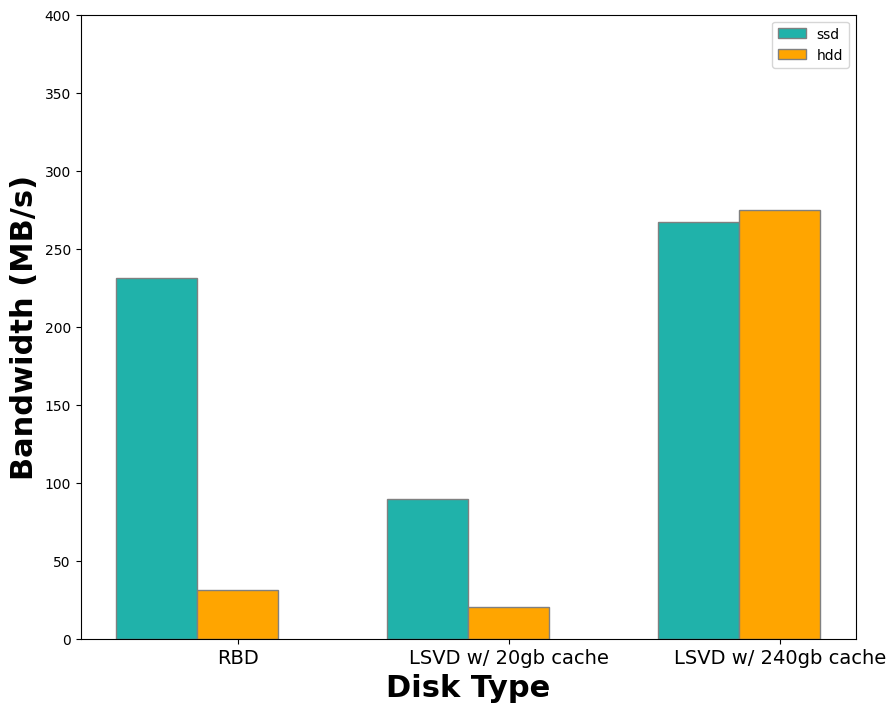

In [31]:
xlabel=['RBD', 'LSVD w/ 20gb cache', 'LSVD w/ 240gb cache']
barWidth = 0.30
fig = plt.subplots(figsize =(10, 8)) 

ssd_rr = [bw_rbd_ssd_rr, bw_20gb_lsvd_ssd_rr, bw_240gb_lsvd_ssd_rr]
ssd_rr1 = extract_values(ssd_rr)
hdd_rr = [bw_rbd_hdd_rr, bw_20gb_lsvd_hdd_rr, bw_240gb_lsvd_hdd_rr]
hdd_rr1 = extract_values(hdd_rr)

print('ssd_rr', ssd_rr)
print('hdd_rr', hdd_rr)
 
br1 = np.arange(len(ssd_rr)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, ssd_rr1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='ssd') 
plt.bar(br2, hdd_rr1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='hdd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
plt.xlabel('Disk Type', fontweight ='bold', fontsize = 22) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 22)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(ssd_rr))], 
        xlabel, fontsize=14)
 
plt.legend()
description = f"FIO Performance for Random Read for LSVD vs RBD in SSD and Hard Disk Backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_rr_3bar.png')
plt.show()

ssd_rw ['144MiB/s', '190MiB/s', '189MiB/s']
hdd_rw ['4907KiB/s', '180MiB/s', '186MiB/s']


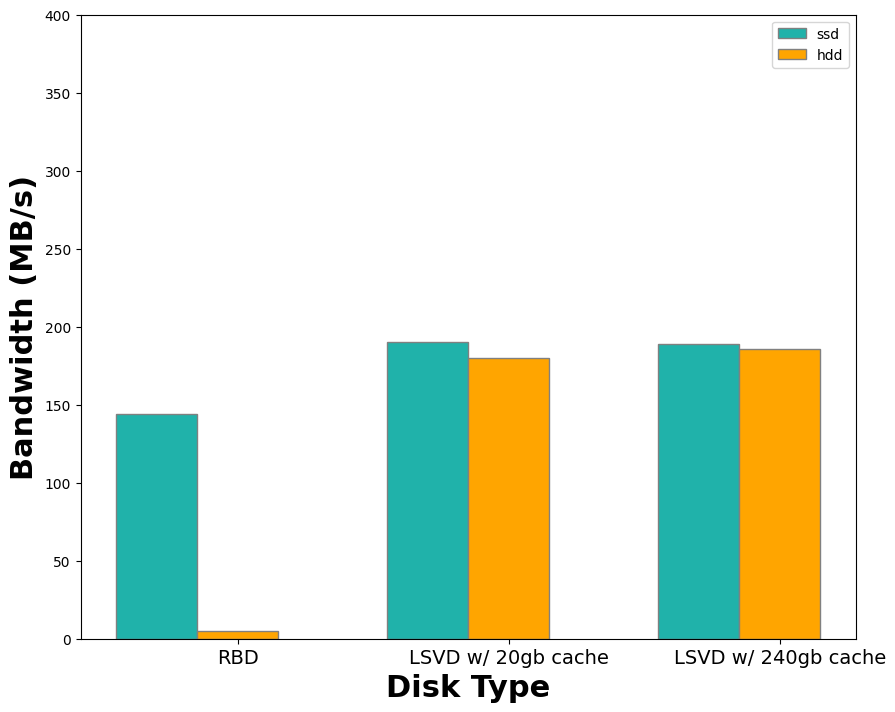

In [32]:
xlabel=['RBD', 'LSVD w/ 20gb cache', 'LSVD w/ 240gb cache']
barWidth = 0.30
fig = plt.subplots(figsize =(10, 8)) 

ssd_rw = [bw_rbd_ssd_rw, bw_20gb_lsvd_ssd_rw, bw_240gb_lsvd_ssd_rw]
ssd_rw1 = extract_values(ssd_rw)
hdd_rw = [bw_rbd_hdd_rw, bw_20gb_lsvd_hdd_rw, bw_240gb_lsvd_hdd_rw]
hdd_rw1 = extract_values(hdd_rw)

print('ssd_rw', ssd_rw)
print('hdd_rw', hdd_rw)
 
br1 = np.arange(len(ssd_rw)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, ssd_rw1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='ssd') 
plt.bar(br2, hdd_rw1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='hdd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
plt.xlabel('Disk Type', fontweight ='bold', fontsize = 22) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 22)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(ssd_rw))], 
        xlabel, fontsize=14)
 
plt.legend()
description = f"FIO Performance for Random Read for LSVD vs RBD in SSD and Hard Disk Backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_rw_3bar.png')
plt.show()

ssd_sr ['19.4MiB/s', '307MiB/s', '339MiB/s']
hdd_sr ['19.8MiB/s', '309MiB/s', '344MiB/s']


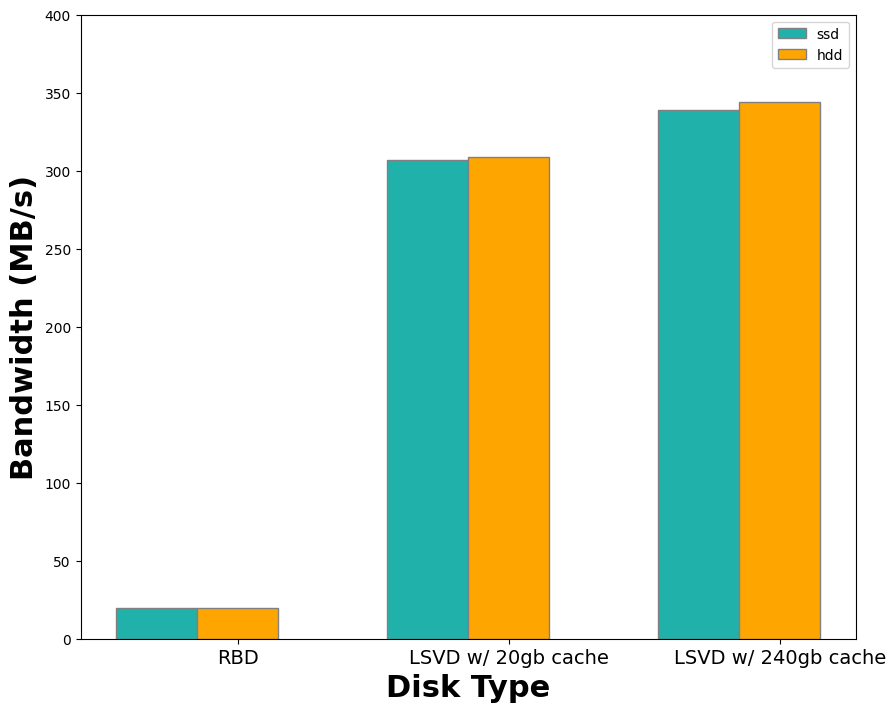

In [33]:
xlabel=['RBD', 'LSVD w/ 20gb cache', 'LSVD w/ 240gb cache']
barWidth = 0.30
fig = plt.subplots(figsize =(10, 8)) 

ssd_sr = [bw_rbd_ssd_sr, bw_20gb_lsvd_ssd_sr, bw_240gb_lsvd_ssd_sr]
ssd_sr1 = extract_values(ssd_sr)
hdd_sr = [bw_rbd_hdd_sr, bw_20gb_lsvd_hdd_sr, bw_240gb_lsvd_hdd_sr]
hdd_sr1 = extract_values(hdd_sr)

print('ssd_sr', ssd_sr)
print('hdd_sr', hdd_sr)
 
br1 = np.arange(len(ssd_sr)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, ssd_sr1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='ssd') 
plt.bar(br2, hdd_sr1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='hdd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
plt.xlabel('Disk Type', fontweight ='bold', fontsize = 22) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 22)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(ssd_sr))], 
        xlabel, fontsize=14)
 
plt.legend()
description = f"FIO Performance for Random Read for LSVD vs RBD in SSD and Hard Disk Backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_sr_3bar.png')
plt.show()

ssd_sw ['52.3MiB/s', '187MiB/s', '189MiB/s']
hdd_sw ['7194KiB/s', '184MiB/s', '186MiB/s']


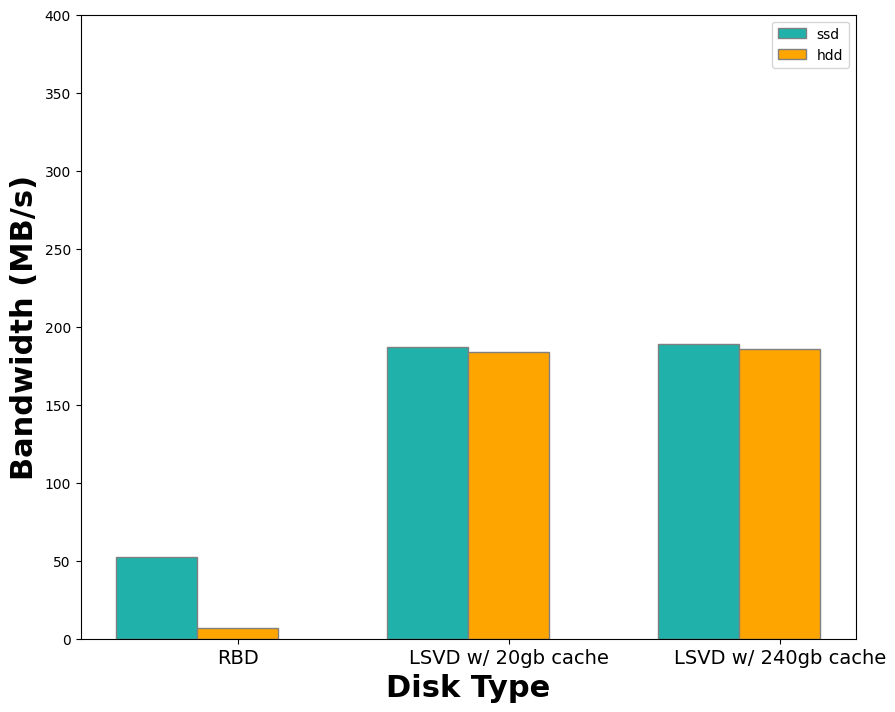

In [34]:
xlabel=['RBD', 'LSVD w/ 20gb cache', 'LSVD w/ 240gb cache']
barWidth = 0.30
fig = plt.subplots(figsize =(10, 8)) 

ssd_sw = [bw_rbd_ssd_sw, bw_20gb_lsvd_ssd_sw, bw_240gb_lsvd_ssd_sw]
ssd_sw1 = extract_values(ssd_sw)
hdd_sw = [bw_rbd_hdd_sw, bw_20gb_lsvd_hdd_sw, bw_240gb_lsvd_hdd_sw]
hdd_sw1 = extract_values(hdd_sw)

print('ssd_sw', ssd_sw)
print('hdd_sw', hdd_sw)
 
br1 = np.arange(len(ssd_sw)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, ssd_sw1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='ssd') 
plt.bar(br2, hdd_sw1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='hdd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
plt.xlabel('Disk Type', fontweight ='bold', fontsize = 22) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 22)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(ssd_sw))], 
        xlabel, fontsize=14)
 
plt.legend()
description = f"FIO Performance for Random Read for LSVD vs RBD in SSD and Hard Disk Backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_sw_3bar.png')
plt.show()